In [2]:
#import libraries

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, 
                                   PolynomialFeatures)
import pylab
import seaborn as sns
#from scipy.stats.mstats import normaltest
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

from pandas import read_csv
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import inv_boxcox
url = "https://raw.githubusercontent.com/rashida048/Datasets/master/cars.csv"

In [3]:
data_raw = read_csv(url)
y_col = 'COMB (kWh/100 km)'
x_col = 'Size (kW)'
data_raw.head()

,YEAR,Make,Model,Size,(kW),Unnamed: 5,TYPE,CITY (kWh/100 km),HWY (kWh/100 km),COMB (kWh/100 km),CITY (Le/100 km),HWY (Le/100 km),COMB (Le/100 km),(g/km),RATING,(km),TIME (h)
0,2012,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,NaN,100,7
1,2012,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7
2,2013,FORD,FOCUS ELECTRIC,COMPACT,107,A1,B,19.0,21.1,20.0,2.1,2.4,2.2,0,NaN,122,4
3,2013,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,NaN,100,7
4,2013,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7


In [35]:
#drop columns that are not important to us
columns = ['Unnamed: 5', 'TYPE', '(g/km)', 'RATING', 'TIME (h)']
data = data_raw.drop(columns, axis = 1)

In [5]:
#get normal test Result which brings us statistic and pvalue
#normaltest is a test that differes from an normal distribution
print('NormaltestResult')
for i in data.columns:
    if data[i].dtype == 'int64' or data[i].dtype == 'float64':
        print (str(i) + ' ---> ' + str(stats.normaltest(data[i])))
#print skewness for each columns
print('Skewness')        
print (data.skew())

NormaltestResult
YEAR ---> NormaltestResult(statistic=6.572959165352991, pvalue=0.03738522961390805)
(kW) ---> NormaltestResult(statistic=7.321037190821667, pvalue=0.025719171423019174)
CITY (kWh/100 km) ---> NormaltestResult(statistic=70.14515644771824, pvalue=5.863714426994686e-16)
HWY (kWh/100 km) ---> NormaltestResult(statistic=3.277438484649402, pvalue=0.19422864288348685)
COMB (kWh/100 km) ---> NormaltestResult(statistic=6.240078947284884, pvalue=0.044155425409817116)
CITY (Le/100 km) ---> NormaltestResult(statistic=60.99718630445533, pvalue=5.683675677110317e-14)
HWY (Le/100 km) ---> NormaltestResult(statistic=3.1165271538283656, pvalue=0.2105012733068826)
COMB (Le/100 km) ---> NormaltestResult(statistic=14.090361944759387, pvalue=0.000871599113159755)
(km) ---> NormaltestResult(statistic=188.30657011037007, pvalue=1.2875018076706825e-41)
Skewness
YEAR                -0.572928
(kW)                 0.939392
CITY (kWh/100 km)    0.201837
HWY (kWh/100 km)    -0.493752
COMB (kWh/100

# Different Normality tests on the data.
I will present different normality tests on two columns that have pvalue > 0.05 which is a sign of gaussian and two columns that have really low pvalue so we will see the difference. 

## Different Graphs

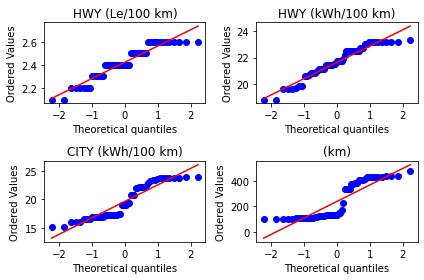

In [6]:
y_1 = 'HWY (Le/100 km)' #pvalue  -> 0.2105012733068826 
y_2 = 'HWY (kWh/100 km)' #pvalue -> 0.19422864288348685
y_3 = 'CITY (kWh/100 km)' #pvalue -> 5.863714426994686e-16
y_4 = '(km)' #pvalue -> 1.2875018076706825e-41
#y_1
measurments = data[y_1]
fig, axs = plt.subplots(2,2)
stats.probplot(measurments, dist='norm', plot=axs[0,0])
axs[0,0].set_title(str(y_1))


#y_2
measurments_2 = data[y_2]
stats.probplot(measurments_2, dist='norm', plot=axs[0,1])
axs[0,1].set_title(str(y_2))


#y_3
measurments_3 = data[y_3]
stats.probplot(measurments_3, dist='norm', plot=axs[1,0])
axs[1,0].set_title(str(y_3))


#y_4
measurments_4 = data[y_4]
stats.probplot(measurments_4, dist='norm', plot=axs[1,1])
axs[1,1].set_title(str(y_4))
plt.tight_layout()

## Box plots

<AxesSubplot:xlabel='(km)'>

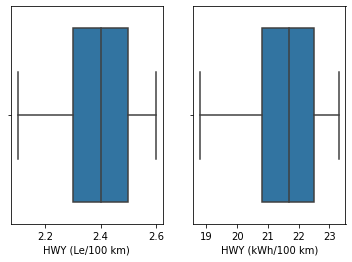

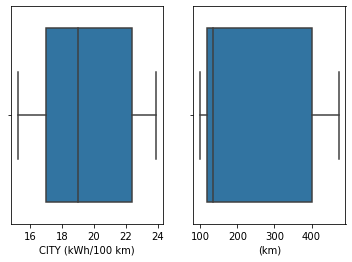

In [7]:
fig, axs = plt.subplots(1,2)
sns.boxplot(x = measurments, ax = axs[0])
sns.boxplot(x = measurments_2, ax = axs[1])

fig, axs = plt.subplots(1,2)
sns.boxplot(x = measurments_3, ax = axs[0])
sns.boxplot(x = measurments_4, ax = axs[1])

## Histograms 

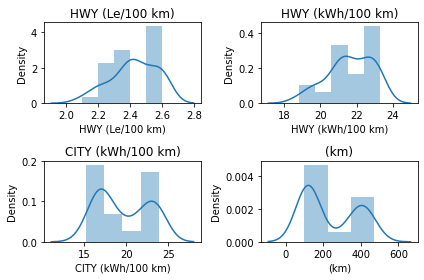

In [8]:
f, axs = plt.subplots(2,2)

sns.distplot(measurments, ax=axs[0,0])
axs[0,0].set_title(y_1)
sns.distplot(measurments_2, ax=axs[0,1])
axs[0,1].set_title(y_2)
sns.distplot(measurments_3, ax=axs[1,0])
axs[1,0].set_title(y_3)
sns.distplot(measurments_4, ax=axs[1,1])
axs[1,1].set_title(y_4)
plt.tight_layout()

# Different statistical test for Normality

when doing Normality tests I recommed doing every test, to see the difference and learn somthing from your data!

 ## Kolmogorov-Smirnov test for Normality

In [9]:
l = [measurments,measurments_2, measurments_3, measurments_4]
names = [y_1, y_2, y_3, y_4]
c = 0
for i in l: 
    statistic, pvalue = stats.kstest(i, 'norm')
    print(names[c])
    print('statistic = %.2f, p = %.1f' %(statistic, pvalue))
    if pvalue > 0.05:
        print ('Gaussian')
    else:
        print('Not Gaussian')
    c += 1

HWY (Le/100 km)
statistic = 0.98, p = 0.0
Not Gaussian
HWY (kWh/100 km)
statistic = 1.00, p = 0.0
Not Gaussian
CITY (kWh/100 km)
statistic = 1.00, p = 0.0
Not Gaussian
(km)
statistic = 1.00, p = 0.0
Not Gaussian


## NormalTest (D'agostino's)

In [10]:
c = 0
for i in l:
    statistic, pvalue = stats.normaltest(i)
    print(names[c])
    print('statistic = %.2f, p = %.5f' %(statistic, pvalue))
    if pvalue > 0.05:
        print ('Gaussian')
    else:
        print('Not Gaussian')
    c += 1

HWY (Le/100 km)
statistic = 3.12, p = 0.21050
Gaussian
HWY (kWh/100 km)
statistic = 3.28, p = 0.19423
Gaussian
CITY (kWh/100 km)
statistic = 70.15, p = 0.00000
Not Gaussian
(km)
statistic = 188.31, p = 0.00000
Not Gaussian


## Shapiro-Wilk Test

This test is the most popular since it has a strong variety. 

In [17]:
c = 0
for i in l:
    statistic, pvalue = stats.shapiro(i)
    print(names[c])
    print('statistic = %.2f, p = %f' %(statistic, pvalue))
    if pvalue > 0.05:
        print ('Gaussian')
    else:
        print('Not Gaussian')
    c += 1

HWY (Le/100 km)
statistic = 0.90, p = 0.000443
Not Gaussian
HWY (kWh/100 km)
statistic = 0.93, p = 0.005350
Not Gaussian
CITY (kWh/100 km)
statistic = 0.87, p = 0.000029
Not Gaussian
(km)
statistic = 0.77, p = 0.000000
Not Gaussian


## Chi-Square Normality Test

In [38]:
c = 0
for i in l:
    statistic, pvalue = stats.chisquare(i)
    print(names[c])
    print('statistic = %.2f, p = %.5f' %(statistic, pvalue))
    if pvalue > 0.05:
        print ('Gaussian')
    else:
        print('Not Gaussian')
    c += 1

HWY (Le/100 km)
statistic = 0.44, p = 1.00000
Gaussian
HWY (kWh/100 km)
statistic = 3.73, p = 1.00000
Gaussian
CITY (kWh/100 km)
statistic = 23.84, p = 0.99972
Gaussian
(km)
statistic = 4348.68, p = 0.00000
Not Gaussian


## Lilliefors Test for Normality

In [13]:
from statsmodels.stats.diagnostic import lilliefors
c = 0
for i in l:
    statistic, pvalue = lilliefors(i)
    print(names[c])
    print('statistic = %.2f, p = %.5f' %(statistic, pvalue))
    if pvalue > 0.05:
        print ('Gaussian')
    else:
        print('Not Gaussian')
    c += 1

HWY (Le/100 km)
statistic = 0.17, p = 0.00100
Not Gaussian
HWY (kWh/100 km)
statistic = 0.15, p = 0.00413
Not Gaussian
CITY (kWh/100 km)
statistic = 0.22, p = 0.00100
Not Gaussian
(km)
statistic = 0.29, p = 0.00100
Not Gaussian


## Jarque–Bera test for Normality 

In [39]:
c = 0
for i in l:
    statistic, pvalue = stats.jarque_bera(i)
    print(names[c])
    print('statistic = %.2f, p = %.5f' %(statistic, pvalue))
    if pvalue > 0.05:
        print ('Gaussian')
    else:
        print('Not Gaussian')
    c += 1

HWY (Le/100 km)
statistic = 2.66, p = 0.26389
Gaussian
HWY (kWh/100 km)
statistic = 2.89, p = 0.23546
Gaussian
CITY (kWh/100 km)
statistic = 5.78, p = 0.05544
Gaussian
(km)
statistic = 7.69, p = 0.02134
Not Gaussian


# Conclusion

As we see we get very different results, which is normal because of different procedures in each method. With simple data I would still gor for the D'agustino or Shapiro test which is widely used. 